# PIV structure in Numpy

In [37]:
import numpy as np
data = np.ones(12, dtype = [('x', int), ('y', int),
                               ('u', float), ('v', float), 
                               ('mask', bool), ('s2n', float)])

In [38]:
# we can assign every row of this data:
data[0] = (16,16,1.0,.5,True,1.)

In [39]:
# or assign it using the datatype properties, x,y,u,v
x,y = np.meshgrid(np.arange(1,4)*16,np.arange(1,5)*12)

data['x'] = x.reshape(12,)
data['y'] = y.reshape(12,)

data['u'] = np.random.rand(12,)
data['v'] = np.random.rand(12,)

&lt;matplotlib.quiver.Quiver at 0x7f6d0dbf4ee0&gt;

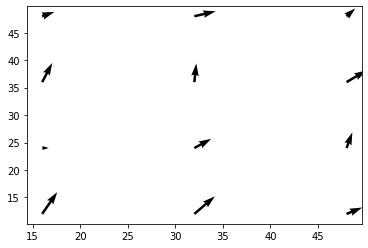

In [40]:
import matplotlib.pyplot as pl

pl.figure()
pl.quiver(data['x'],data['y'],data['u'],data['v'])

## The simple data structure is not sufficient - use xarray

PIV data requires also metadata, header, information about the origin of the data file (image, experimental settings)
and so on. Therefore we need a format that can be easily extended, widely supported, allow use of datatypes and so on. 

Among various possibilities we have chosen the `xarray`, or so-called N-D labeled arrays, Read more about this format in this [paper](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/) or in their [docs](https://xarray.pydata.org/en/stable/)

In [41]:
import xarray as xr

In [42]:
x = np.linspace(32.0, 128.0, 3) # 3 columns
y = np.linspace(16.0, 128.0, 4) # 4 rows

xm, ym = np.meshgrid(x, y)
u = np.ones_like(xm.T) + np.linspace(0.0, 7.0, 4)
v = (
    np.zeros_like(ym.T)
    + np.linspace(0.0, 1.0, 4)
    + np.random.rand(3, 1)
    - 0.5
)

u = u[:, :, np.newaxis]
v = v[:, :, np.newaxis]
chc = np.ones_like(u)

# plt.quiver(xm.T,ym.T,u,v)

u = xr.DataArray(
    u, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)
v = xr.DataArray(
    v, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)
chc = xr.DataArray(
    chc, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)

data = xr.Dataset({"u": u, "v": v, "chc": chc})

data.attrs["variables"] = ["x", "y", "u", "v"]
data.attrs["units"] = ["pix", "pix", "pix/dt", "pix/dt"]
data.attrs["dt"] = 1.0
data.attrs["files"] = ""

data

&lt;xarray.Dataset&gt;
Dimensions:  (t: 1, x: 3, y: 4)
Coordinates:
  * x        (x) float64 32.0 80.0 128.0
  * y        (y) float64 16.0 53.33 90.67 128.0
  * t        (t) int64 0
Data variables:
    u        (x, y, t) float64 1.0 3.333 5.667 8.0 1.0 ... 1.0 3.333 5.667 8.0
    v        (x, y, t) float64 0.3209 0.6543 0.9876 ... 0.02535 0.3587 0.692
    chc      (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  [&#39;x&#39;, &#39;y&#39;, &#39;u&#39;, &#39;v&#39;]
    units:      [&#39;pix&#39;, &#39;pix&#39;, &#39;pix/dt&#39;, &#39;pix/dt&#39;]
    dt:         1.0
    files: